In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.exposure import rescale_intensity
from skimage.filters import gaussian
from skimage.transform import rotate
import numpy as np
import subprocess
from scipy.interpolate import interp2d,griddata
#%run './utils.py'
import os
import pickle as pkl
%matplotlib notebook



    

In [2]:
directory_name = './rec_images/'
faces = []
snow_accumulations = []
widths = []
ims = []
for cc,filename in zip(range(len(os.listdir(directory_name))),os.listdir(directory_name)):
    print(filename)
    im = imread(directory_name+filename)
    ims.append(im[0::10,0::10,:])
    snow = np.zeros(im.shape)
    snow[np.where(im>120)]=1
    el = pkl.load(open('./elevation/'+filename[0:-4]+'.pckl','rb'))
    Del = np.gradient(el)
    Del[1][np.where(np.abs(Del[0])<1e-15)]=100*np.sign(Del[1][np.where(np.abs(Del[0])<1e-15)])
    Del[0][np.where(np.abs(Del[0])<1e-15)]=1
    dir = np.arctan(np.divide(Del[1],Del[0]))
    dir[np.where(Del[0]<0)]=np.pi+dir[np.where(Del[0]<0)]
    dir[np.where(dir<0)]=2*np.pi+dir[np.where(dir<0)]
    ndir = dir[np.where(snow[:,:,0]>0)]
    radii,theta = np.histogram(ndir,bins='auto')
    radiiref,poo = np.histogram(dir,bins=theta)
    widths.append(theta[3]-theta[2])
    theta = theta[0:-1]
    radii = np.divide(radii,radiiref)
    theta = theta-np.pi
    theta[np.where(theta<0)]=2*np.pi+theta[np.where(theta<0)]
    faces.append(theta)
    snow_accumulations.append(radii)


20170630_174413.png
20170706_174445.png
20170707_174627.png
20170708_174624.png
20170713_174615.png
20170719_174951.png
20170729_174454.png
20170825_182359.png
20170928_175424.png
20171017_174939.png


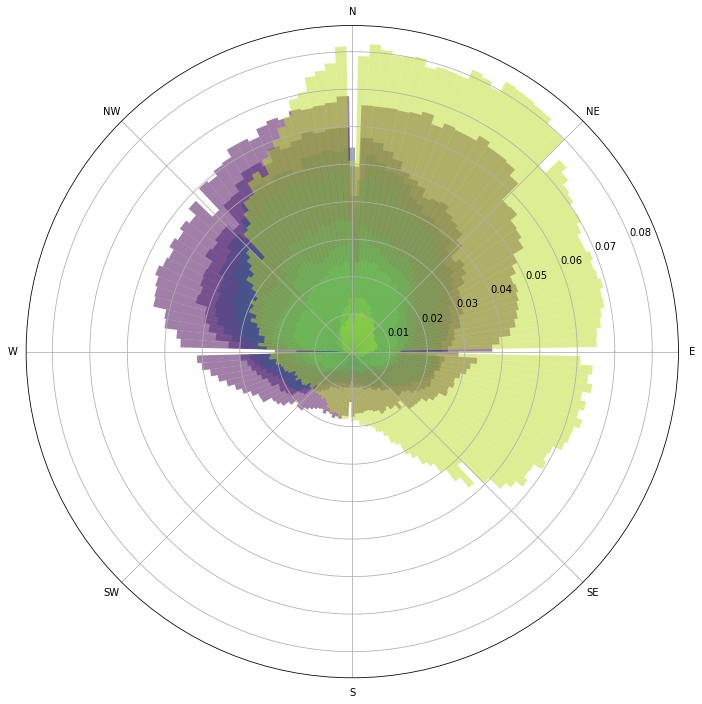

In [3]:
plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='polar')
for cc,theta,radii,width in zip(range(len(faces)),faces,snow_accumulations,widths):
    bars = ax.bar(theta, radii, width=width, bottom=0.0,color=plt.cm.viridis(cc/len(os.listdir(directory_name))),alpha=0.5)
ax.set_xticks([0, np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,3*np.pi/2,7*np.pi/4])
ax.set_xticklabels(['E','NE','N','NW','W','SW','S','SE'])
plt.show()

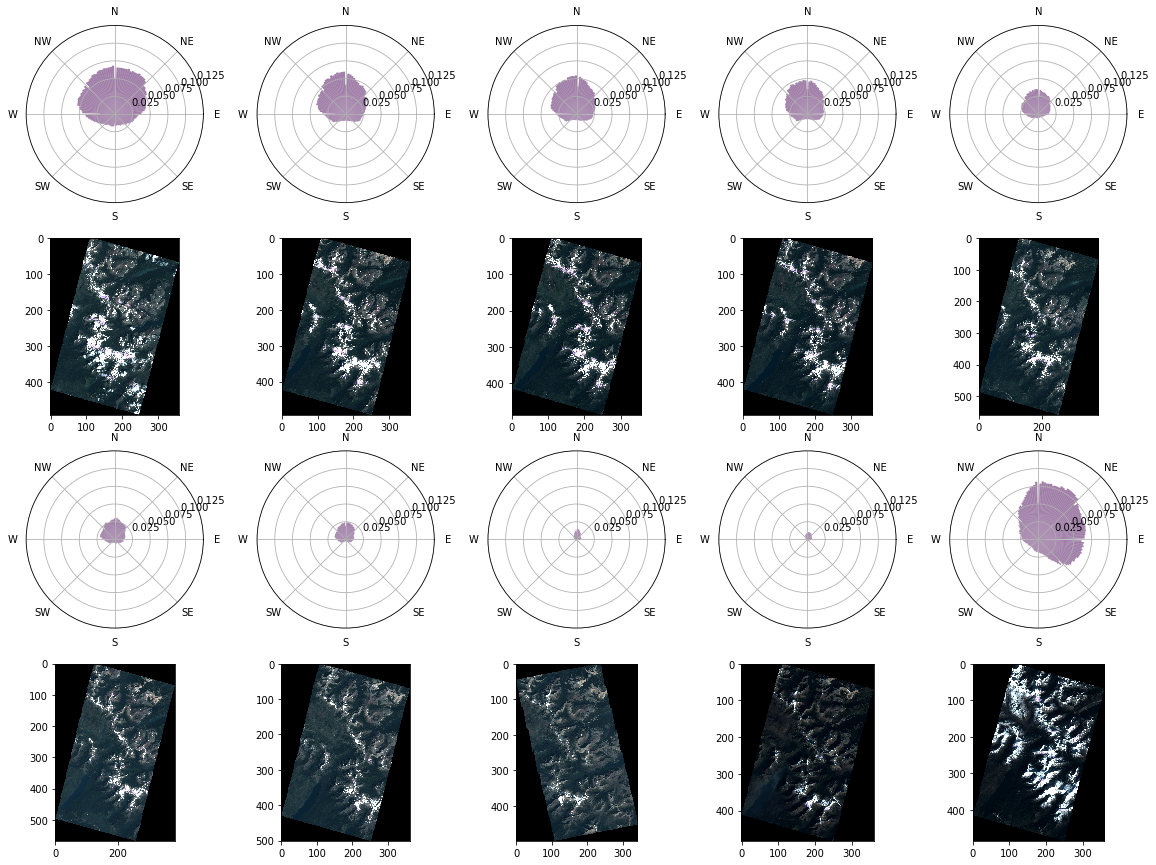

In [7]:
plt.figure(figsize=(20, 15))
for cc,theta,radii,width in zip(range(len(faces)),faces,snow_accumulations,widths):
    if cc<5:
        count = cc+1
    else:
        count = 5+cc+1
    ax = plt.subplot(4,5,count, projection='polar')    
    bars = ax.bar(theta, radii, width=width, bottom=0.0,color=plt.cm.viridis(0/len(os.listdir(directory_name))),alpha=0.5)
    ax.set_xticks([0, np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,3*np.pi/2,7*np.pi/4])
    ax.set_yticks([0.025,0.05,0.075,0.1,0.125])
    ax.set_xticklabels(['E','NE','N','NW','W','SW','S','SE'])
    im_display = rescale_intensity(ims[cc],out_range=(0,255),in_range=(10,120)).astype('uint8')
    ax = plt.subplot(4,5,count+5)
    plt.imshow(im_display)
plt.show()